# **MÓDULO 39 - Exercicio - Aplicando XGboost**

Nessa atividade vocês usarão uma base já connhecida, a base de propensão a compra de carros.
Já utilizamos essa base antes, nessa atividade, você deve carregar a base, realizar os tratamentos necessários, rodar o XGBoost, encontrar as principais variaveis.
Vamos lá!

In [29]:
import pandas as pd
import numpy as np

import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score
)

import matplotlib.pyplot as plt
import seaborn as sns


# 1. Carrega a base de dados, verifique os tipos de dados, dados faltantes e drop a coluna ID.


In [30]:
# Carregamento da base
df = pd.read_csv('CARRO_CLIENTES.csv')

# Visão inicial dos dados
print(df.head())

# Estrutura da base e tipos de dados
print(df.info())



   User ID Gender  Age  AnnualSalary  Purchased
0      385   Male   35         20000          0
1      681   Male   40         43500          0
2      353   Male   49         74000          0
3      895   Male   40        107500          1
4      661   Male   25         79000          0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB
None


In [31]:
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [32]:
missing = df.isnull().sum()
missing = missing[missing > 0]
missing


Series([], dtype: int64)

In [33]:
df.duplicated().sum()


np.int64(0)

In [34]:
df = df.drop(columns=['ID'], errors='ignore')


# 2. Aplique o Label Encoder para a coluna Gender e exclua a coluna categórica.

In [35]:
df['Gender'].value_counts()


Gender
Female    516
Male      484
Name: count, dtype: int64

In [36]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Gender_encoded'] = le.fit_transform(df['Gender'])


In [37]:
df = df.drop(columns=['Gender'])


In [38]:
df.head()
df.dtypes


User ID           int64
Age               int64
AnnualSalary      int64
Purchased         int64
Gender_encoded    int64
dtype: object

# 3. Faça a matriz de correlação e analise as váriaveis que parecem ter maior correlação com a váriavel target.

In [39]:
df.dtypes


User ID           int64
Age               int64
AnnualSalary      int64
Purchased         int64
Gender_encoded    int64
dtype: object

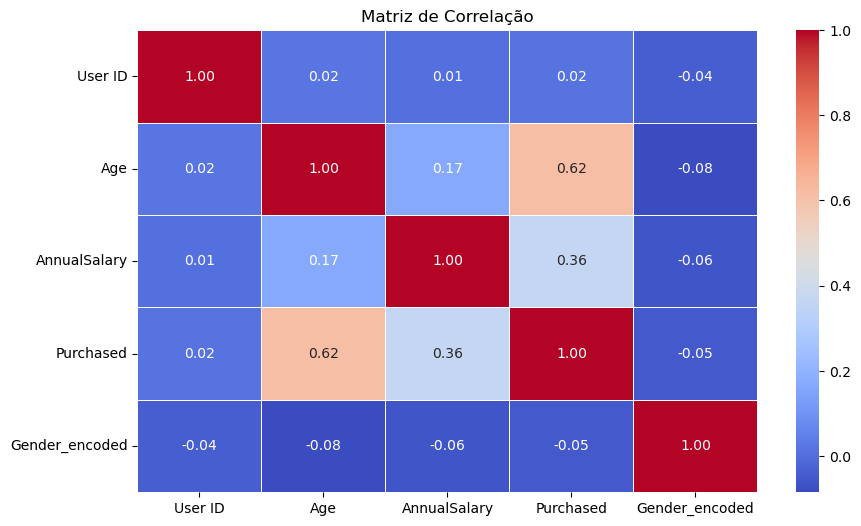

In [40]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    df.corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Matriz de Correlação")
plt.show()


# 4. Faça a separação da base em X e Y e em seguida nas bases de treino e teste.

In [41]:
target = 'Purchased'


In [42]:
X = df.drop(columns=[target])
y = df[target]


In [43]:
X.shape, y.shape


((1000, 4), (1000,))

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42,
    stratify=y
)


In [45]:
print('Distribuição no treino:')
print(y_train.value_counts(normalize=True))

print('\nDistribuição no teste:')
print(y_test.value_counts(normalize=True))


Distribuição no treino:
Purchased
0    0.597333
1    0.402667
Name: proportion, dtype: float64

Distribuição no teste:
Purchased
0    0.6
1    0.4
Name: proportion, dtype: float64


# 5. Treino o modelo Xgboost com sua base de treino.
Pesquise alguns hyperparametros na bibllioteca para utilizar, utilize ao menos 2.

In [46]:
import xgboost as xgb

model = xgb.XGBClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)


In [47]:
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [48]:
print("Modelo treinado com sucesso")


Modelo treinado com sucesso


# 6. Realize as previsões para a base de teste e traga as probabilidades das previsões.

In [49]:
y_prob = model.predict_proba(X_test)[:, 1]


In [50]:
y_prob[:10]


array([0.92836607, 0.00160129, 0.9397503 , 0.61860776, 0.94016486,
       0.03161777, 0.08768684, 0.6561064 , 0.8384111 , 0.00649879],
      dtype=float32)

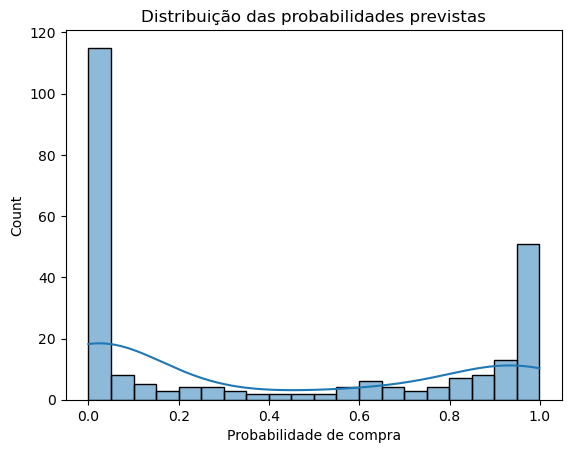

In [51]:
sns.histplot(y_prob, bins=20, kde=True)
plt.title("Distribuição das probabilidades previstas")
plt.xlabel("Probabilidade de compra")
plt.show()


# 7. Faça a transformação das probabilidades nas previsões binárias e avalie o desempenho do modelo.

In [52]:
threshold = 0.5
y_pred = (y_prob >= threshold).astype(int)


In [53]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.92      0.93       150
           1       0.88      0.90      0.89       100

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250



In [54]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_prob)
print(f'ROC-AUC: {roc_auc:.3f}')


ROC-AUC: 0.964


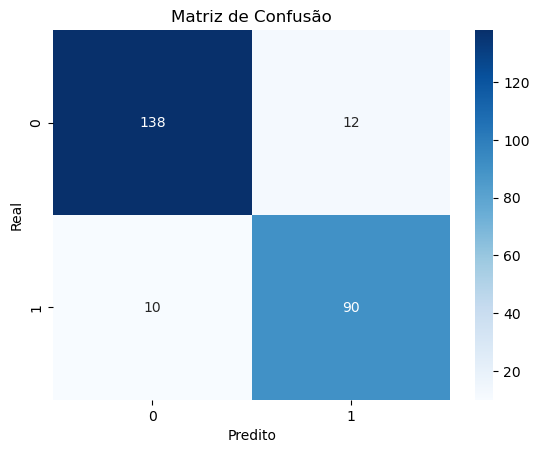

In [55]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()


# 8. Traga a lista com a feature importance.
As features mais importantes são as mesmas que indicaram maior correlação na matriz de correlação?

In [56]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance
    

,Feature,Importance
1,Age,0.462886
2,AnnualSalary,0.344124
0,User ID,0.102985
3,Gender_encoded,0.090005


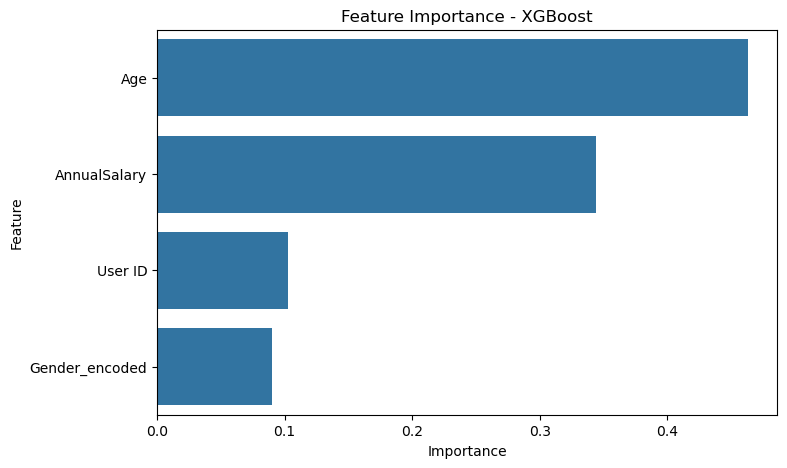

In [57]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=feature_importance,
    x='Importance',
    y='Feature'
)
plt.title('Feature Importance - XGBoost')
plt.show()
